## Iris Classification

import all necesarry libraries

In [51]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.12.1
pandas version: 0.20.1
scikit-learn version: 0.18.1
matplotlib version: 2.0.2


Reading iris dataframe

In [13]:
datafolder = 'data/'
filename = 'iris.data.csv'
iris = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')
print(iris.shape)
iris.head()

(149, 5)


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In the output above can be seen that there are no proper headers, this we have to add them

In [15]:
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


map species types to numbers to allow us to analyse it

In [19]:
iris['Label'] = iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Label
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


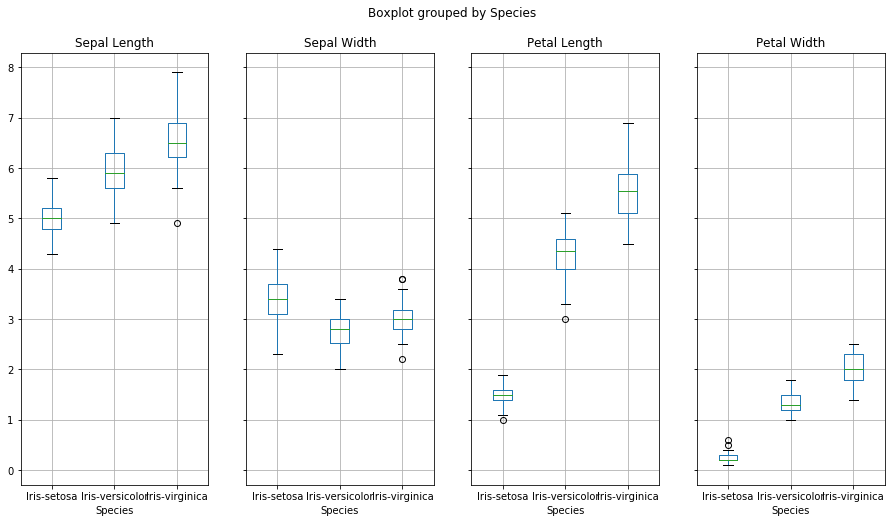

In [26]:
features = tuple(iris.columns[:4].values)
iris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));

In [39]:
# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = iris[['Sepal Length','Sepal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = iris['Label']

# Standarize the features
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [43]:
# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(111, 2) (111,)


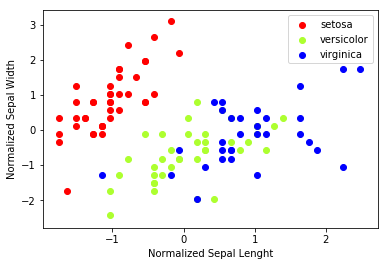

In [44]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Sepal Lenght')
plt.ylabel('Normalized Sepal Width')

In [49]:
clf = SVC(kernel='rbf')

# Fit (= train) the classifier
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.736842105263


In [53]:
def evaluate_cross_validation(clf, X, y, K):
    # Create a k-fold cross validation iterator
    kf = KFold(K, shuffle=True, random_state=0)
    
    # By default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=kf)
    
    # scores = cross_val_score(clf, X, y, cv=K)     # This also works directly, without KFold function!
    
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))
    
evaluate_cross_validation(clf, X_train, y_train, 5)

[ 0.73913043  0.86363636  0.72727273  0.77272727  0.77272727]
Mean score: 0.775 (+/-0.024)
